In [9]:
from funman.funman import Funman
from funman.model import Model, Parameter
from funman.scenario import ParameterSynthesisScenario

from pysmt.typing import INT, REAL, BOOL
from pysmt.shortcuts import get_model, And, Or, Symbol, Real, GT, LE, GE, Equals, Plus, Times, Minus
import os


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


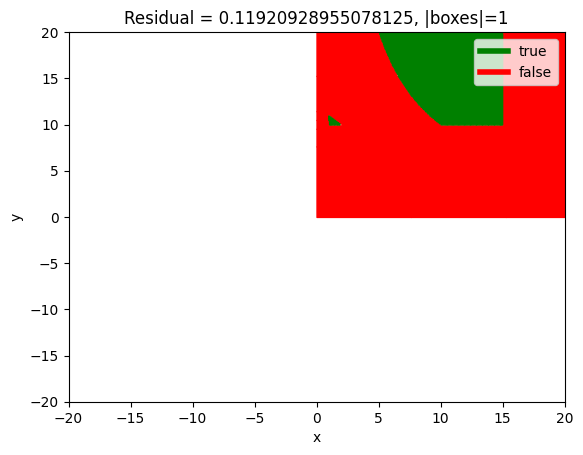

In [10]:
x = Symbol("x", REAL)
y = Symbol("y", REAL)
parameters = [Parameter("x", x), Parameter("y", y)]

# 0.0 < x < 5.0, 10.0 < y < 12.0
model = Model(
    Or(
        And(
            LE(x, Real(5.0)), 
            GE(x, Real(0.0)),
            LE(y, Real(12.0)), 
            GE(y, Real(10.0)),
            LE(Plus(x, y), Real(12.0)),
            GE(Times(x, y), Real(10.0))
            ),
        And(
            LE(x, Real(15.0)), 
            GE(x, Real(5.0)),
            LE(y, Real(20.0)), 
            GE(y, Real(10.0)),
            LE(Minus(x, y), Real(10.0)),
            GE(Times(x, y), Real(100.0))
            )
        )
    )

scenario = ParameterSynthesisScenario(parameters, model)
fm = Funman()
result = fm.solve(scenario)

<AxesSubplot:title={'center':'Residual per Iteration'}, xlabel='Iteration', ylabel='Residual'>

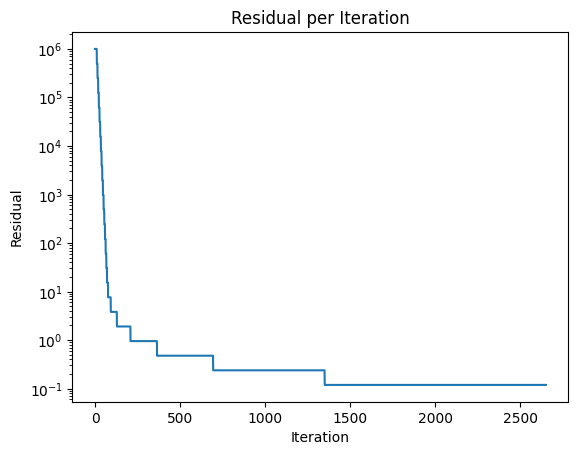

In [11]:
import pandas as pd

residual = pd.Series(data=result.result[3].residual)
residual.plot(title="Residual per Iteration", xlabel="Iteration", ylabel="Residual", logy=True)

<AxesSubplot:title={'center':'Cumulative Time'}, xlabel='Iteration', ylabel='Time (s)'>

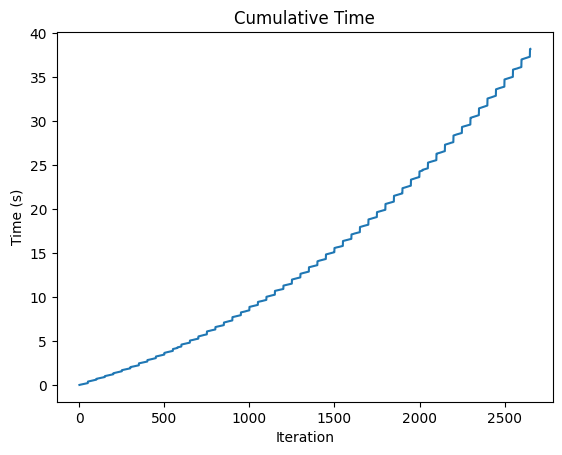

In [12]:
timing = pd.Series(data=result.result[3].iteration_time)
timing.dt.total_seconds().cumsum().plot(title="Cumulative Time", xlabel="Iteration", ylabel="Time (s)")


In [30]:
operation = pd.Series(data=result.result[3].iteration_operation)
# ts = operation.apply(lambda x: x == "s")
# tf = operation.apply(lambda x: x == "f")
# tt = operation.apply(lambda x: x == "t")
color = operation.apply(lambda x: "g" if x == "t" else ("r" if x == "f" else "b"))
op_type = pd.DataFrame(data={#"s" : ts, "f": tf, "t": tt,
 "operation" : operation, "color" : color})

op_type

,operation,color
0,s,b
1,f,r
2,s,b
3,s,b
4,f,r
...,...,...
2648,f,r
2649,t,g
2650,s,b
2651,f,r


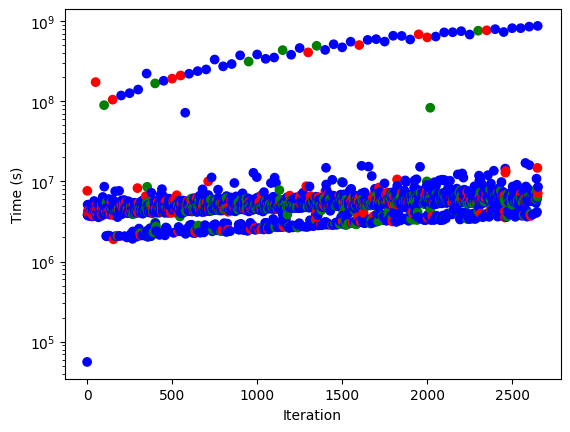

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y=timing, x=timing.index, c=op_type['color'])
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.yscale("log")